In [ ]:
# Preliminary Analysis-inserting our results in without troubleshooting any errors yet

In [2]:
%pylab inline
import pandas as pd

from mpl_toolkits.axes_grid.inset_locator import inset_axes

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [3]:
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

In [4]:
results = pd.read_csv('/Users/BrittanyDorsey/Desktop/my-notebook/SpatialDEresults.csv')
ms_results = pd.read_csv('/Users/BrittanyDorsey/Desktop/my-notebook/testrun_MS_results.csv')
sample_info = pd.read_csv('/Users/BrittanyDorsey/Desktop/my-notebook/sample_info.csv')

In [5]:
import NaiveDE

In [25]:
df = pd.read_csv("/Users/BrittanyDorsey/Desktop/my-notebook/DsRed2-HeLa_10_26_Cell0.csv")
dfm = NaiveDE.stabilize(df).T

In [7]:
results['pval'] = results['pval'].clip_lower(results.query('pval > 0')['pval'].min() / 2)
results['qval'] = results['qval'].clip_lower(results.query('qval > 0')['qval'].min() / 2)
ms_results['pval'] = ms_results['pval'].clip_lower(ms_results.query('pval > 0')['pval'].min() / 2)
ms_results['qval'] = ms_results['qval'].clip_lower(ms_results.query('qval > 0')['qval'].min() / 2)

In [8]:
results.shape

(262144, 19)

In [9]:
results.query('qval < 0.05').shape

(260614, 19)

In [10]:
ms_results.model.value_counts()

SE        253885
linear      5135
PER         1594
Name: model, dtype: int64

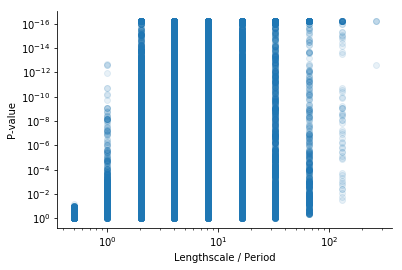

In [11]:
plt.loglog()
plt.scatter(results.l, results.pval, label='Genes', alpha=0.1);
plt.gca().invert_yaxis();
plt.xlabel('Lengthscale / Period')
plt.ylabel('P-value');

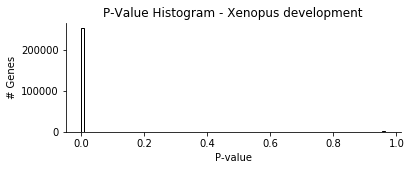

In [12]:
figsize(6, 2)
plt.hist(results.pval, bins=100, color='w', ec='k');
plt.title('P-Value Histogram - Xenopus development')
plt.ylabel('# Genes')
plt.xlabel('P-value');

In [13]:
results.query('qval < 0.05').shape

(260614, 19)

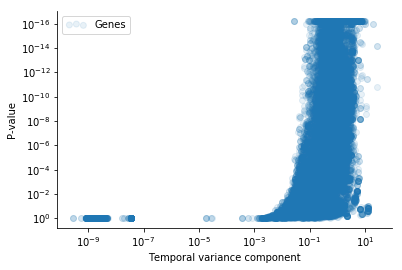

In [14]:
figsize(6, 4)

plt.loglog()
plt.scatter(results.max_s2_t_hat, results.pval, label='Genes', alpha=0.1);
plt.gca().invert_yaxis();
plt.xlabel('Temporal variance component')
plt.ylabel('P-value');

plt.legend(scatterpoints=3);

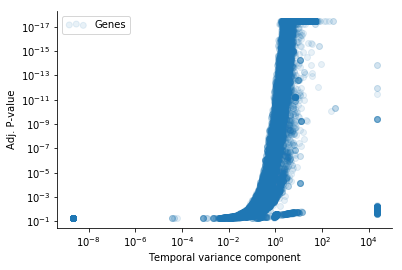

In [15]:
figsize(6, 4)

plt.loglog()
plt.scatter(1 / results.max_delta, results.qval, label='Genes', alpha=0.1);
plt.gca().invert_yaxis();
plt.xlabel('Temporal variance component')
plt.ylabel('Adj. P-value');

plt.legend(scatterpoints=3);

In [16]:
N = 5
top_per_ls = ms_results \
                  .sort_values('qval', ascending=True) \
                  .groupby(['model', 'l']) \
                  .head(N) \
                  .sort_values(['l', 'qval'], ascending=[True, True])
                
top_per_ls.shape

(91, 23)

In [17]:
model_colors = {'SE': 'C0', 'PER': 'C1', 'linear': 'C2'}

NameError: name 'res' is not defined

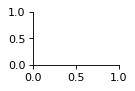

In [30]:
plt.figure(figsize=(8, 20), dpi=80)

N = 5
N_rows = top_per_ls.replace(np.nan, 0).groupby(['model', 'l']).size().shape[0]
for j, T in enumerate(top_per_ls.replace(np.nan, 0).groupby(['model', 'l'])):
    _, group = T
    for i, idx in enumerate(group.index):
        r = top_per_ls.loc[idx]
        ax = plt.subplot(N_rows, N, j * N + i + 1)

        plt.scatter(sample_info.frame_num, res[r['g']], c=res[r['g']], s=10, rasterized=True);

        s = ' *'
        if r['qval'] < 0.01:
            s = ' **'

        if r['qval'] < 0.001:
            s = ' ***'

        name = r['g'].split('|')[-1].replace('unnamed', '')
        if name == '':
            name = r['g'].split('|')[0]
        plt.title(name + s)
        
        plt.xticks([])
        plt.yticks([])
        
        if 5 + r['l'] < 64:
            plt.hlines(ax.get_ylim()[1], 5, 5 + r['l'], color=model_colors[r['model']], zorder=0)
            
        else:
            if r['model'] != 'linear':
                y0 = ax.get_ylim()[1]
                plt.hlines(y0, 5, 50, color=model_colors[r['model']], zorder=0)
                plt.hlines(y0, 54, 66, color=model_colors[r['model']], zorder=0)

        plt.hlines(ax.get_ylim()[1], 5, 5 + 12)
        
        for spine in ax.spines.values():
            spine.set_edgecolor(model_colors[r['model']])
            
        # Make insert with model probabilities
        ins_ax = inset_axes(ax, width='20%', height='10%', loc=3)
        plt.bar((1, 2, 3), top_per_ls.loc[idx][['SE_prob', 'PER_prob', 'linear_prob']], color=['C0', 'C1', 'C2'])
        plt.ylim(0, 1);
        plt.xticks([], [])
        plt.xlim(-0.0, 4)
        plt.yticks([1], ['']);

plt.tight_layout()
plt.savefig('top_frog_gene_grid.pdf')

In [29]:
sample_info.frame_num.max()

133

In [20]:
import SpatialDE.plot

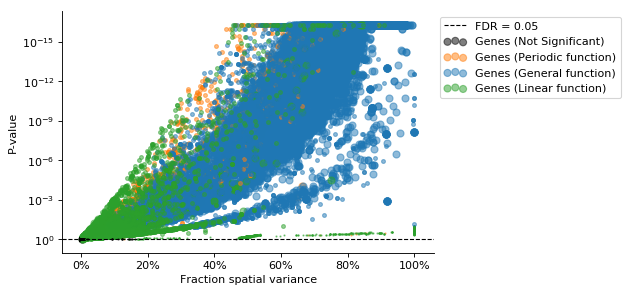

In [21]:
plt.figure(figsize=(6, 4), dpi=80)

SpatialDE.plot.FSV_sig(results, ms_results, covariate_names=['log_num_genes', 'log_ERCC'])

plt.savefig('frog_FSV_pval.pdf', dpi=200, bbox_inches='tight');

In [22]:
from sklearn.preprocessing import scale

In [23]:
top_genes = ms_results.sort_values('qval', ascending=True).head(400)

In [28]:
idx = np.argsort(np.argmax(dfm[top_genes['g']].as_matrix(), 0))[::-1]

figsize(4, 8)
plt.pcolormesh(scale(dfm[top_genes.iloc[idx]['g']].T, 1), vmax=4, vmin=-4, rasterized=True);
cbar = plt.colorbar(shrink=0.5);
cbar.solids.set_rasterized(True) 

x_locs = [0, 20, 40, 60, 80]
plt.xticks(x_locs, [int(i) for i in np.linspace(0, 66, 89)[x_locs]]);
plt.xlabel('HPF');

new_df = top_genes.iloc[idx][['g']].copy()
new_df['pos'] = np.arange(new_df.shape[0])
labels = new_df.merge(top_per_ls, on='g', how='inner')

plt.yticks(labels['pos'], [''] * len(labels['g']));

y_offsets = {
    'ctgf': -1,
    'mapk13': -1,
    'tctn2': -2,
    'cog2': 20,
    'c21orf62': -8,
    'sash3': -4,
    'bix1.1': -2,
    'hunk': -4
}
x_offsets = {
    'bix1.1': -15,
    'itpkc': -10,
    'Xetro.K04277': -8,
}
for i, r in labels.iterrows():
    xy = (0, r['pos'])
    name = r['g'].split('|')[-1].replace('unnamed', '')
    if name == '':
        name = r['g'].split('|')[0]

    xyt = (xy[0] + x_offsets.get(name, -1), xy[1] + y_offsets.get(name, 10))
    plt.annotate(name, xy, xyt, horizontalalignment='right', arrowprops={'arrowstyle': '-'})

plt.savefig('top_frog_heatmap.pdf', bbox_inches='tight');

KeyError: "['0.000000000000000000e+00.112481' '0.000000000000000000e+00.155657'\n '0.000000000000000000e+00.155658' '0.000000000000000000e+00.155659'\n '0.000000000000000000e+00.155660' '0.000000000000000000e+00.155661'\n '0.000000000000000000e+00.155662' '0.000000000000000000e+00.155663'\n '0.000000000000000000e+00.155664' '0.000000000000000000e+00.155665'\n '0.000000000000000000e+00.155666' '0.000000000000000000e+00.155667'\n '0.000000000000000000e+00.155668' '0.000000000000000000e+00.155669'\n '0.000000000000000000e+00.155670' '0.000000000000000000e+00.155671'\n '0.000000000000000000e+00.155672' '0.000000000000000000e+00.155673'\n '0.000000000000000000e+00.155674' '0.000000000000000000e+00.155675'\n '0.000000000000000000e+00.155676' '0.000000000000000000e+00.155677'\n '0.000000000000000000e+00.155678' '0.000000000000000000e+00.155679'\n '0.000000000000000000e+00.155680' '0.000000000000000000e+00.155681'\n '0.000000000000000000e+00.155682' '0.000000000000000000e+00.155683'\n '0.000000000000000000e+00.155656' '0.000000000000000000e+00.155655'\n '0.000000000000000000e+00.155654' '0.000000000000000000e+00.155653'\n '0.000000000000000000e+00.155625' '0.000000000000000000e+00.155626'\n '0.000000000000000000e+00.155627' '0.000000000000000000e+00.155628'\n '0.000000000000000000e+00.155629' '0.000000000000000000e+00.155630'\n '0.000000000000000000e+00.155631' '0.000000000000000000e+00.155632'\n '0.000000000000000000e+00.155633' '0.000000000000000000e+00.155634'\n '0.000000000000000000e+00.155635' '0.000000000000000000e+00.155636'\n '0.000000000000000000e+00.155637' '0.000000000000000000e+00.155684'\n '0.000000000000000000e+00.155638' '0.000000000000000000e+00.155640'\n '0.000000000000000000e+00.155641' '0.000000000000000000e+00.155642'\n '0.000000000000000000e+00.155643' '0.000000000000000000e+00.155644'\n '0.000000000000000000e+00.155645' '0.000000000000000000e+00.155646'\n '0.000000000000000000e+00.155647' '0.000000000000000000e+00.155648'\n '0.000000000000000000e+00.155649' '0.000000000000000000e+00.155650'\n '0.000000000000000000e+00.155651' '0.000000000000000000e+00.155652'\n '0.000000000000000000e+00.155639' '0.000000000000000000e+00.155685'\n '0.000000000000000000e+00.155686' '0.000000000000000000e+00.155687'\n '0.000000000000000000e+00.155720' '0.000000000000000000e+00.155721'\n '0.000000000000000000e+00.155722' '0.000000000000000000e+00.155723'\n '0.000000000000000000e+00.155724' '0.000000000000000000e+00.155725'\n '0.000000000000000000e+00.155726' '0.000000000000000000e+00.155727'\n '0.000000000000000000e+00.155728' '0.000000000000000000e+00.155729'\n '0.000000000000000000e+00.155730' '0.000000000000000000e+00.155731'\n '0.000000000000000000e+00.155732' '0.000000000000000000e+00.155719'\n '0.000000000000000000e+00.155733' '0.000000000000000000e+00.155735'\n '0.000000000000000000e+00.155736' '0.000000000000000000e+00.155737'\n '0.000000000000000000e+00.155738' '0.000000000000000000e+00.155739'\n '0.000000000000000000e+00.155740' '0.000000000000000000e+00.155741'\n '0.000000000000000000e+00.155742' '0.000000000000000000e+00.155743'\n '0.000000000000000000e+00.155744' '0.000000000000000000e+00.155745'\n '0.000000000000000000e+00.155746' '0.000000000000000000e+00.155747'\n '0.000000000000000000e+00.155734' '0.000000000000000000e+00.155624'\n '0.000000000000000000e+00.155718' '0.000000000000000000e+00.155716'\n '0.000000000000000000e+00.155688' '0.000000000000000000e+00.155689'\n '0.000000000000000000e+00.155690' '0.000000000000000000e+00.155691'\n '0.000000000000000000e+00.155692' '0.000000000000000000e+00.155693'\n '0.000000000000000000e+00.155694' '0.000000000000000000e+00.155695'\n '0.000000000000000000e+00.155696' '0.000000000000000000e+00.155697'\n '0.000000000000000000e+00.155698' '0.000000000000000000e+00.155699'\n '0.000000000000000000e+00.155700' '0.000000000000000000e+00.155717'\n '0.000000000000000000e+00.155701' '0.000000000000000000e+00.155703'\n '0.000000000000000000e+00.155704' '0.000000000000000000e+00.155705'\n '0.000000000000000000e+00.155706' '0.000000000000000000e+00.155707'\n '0.000000000000000000e+00.155708' '0.000000000000000000e+00.155709'\n '0.000000000000000000e+00.155710' '0.000000000000000000e+00.155711'\n '0.000000000000000000e+00.155712' '0.000000000000000000e+00.155713'\n '0.000000000000000000e+00.155714' '0.000000000000000000e+00.155715'\n '0.000000000000000000e+00.155702' '0.000000000000000000e+00.155748'\n '0.000000000000000000e+00.155623' '0.000000000000000000e+00.155621'\n '0.000000000000000000e+00.155530' '0.000000000000000000e+00.155531'\n '0.000000000000000000e+00.155532' '0.000000000000000000e+00.155533'\n '0.000000000000000000e+00.155534' '0.000000000000000000e+00.155535'\n '0.000000000000000000e+00.155536' '0.000000000000000000e+00.155537'\n '0.000000000000000000e+00.155538' '0.000000000000000000e+00.155539'\n '0.000000000000000000e+00.155540' '0.000000000000000000e+00.155541'\n '0.000000000000000000e+00.155542' '0.000000000000000000e+00.155543'\n '0.000000000000000000e+00.155544' '0.000000000000000000e+00.155545'\n '0.000000000000000000e+00.155546' '0.000000000000000000e+00.155547'\n '0.000000000000000000e+00.155548' '0.000000000000000000e+00.155549'\n '0.000000000000000000e+00.155550' '0.000000000000000000e+00.155551'\n '0.000000000000000000e+00.155552' '0.000000000000000000e+00.155553'\n '0.000000000000000000e+00.155554' '0.000000000000000000e+00.155555'\n '0.000000000000000000e+00.155556' '0.000000000000000000e+00.155529'\n '0.000000000000000000e+00.155528' '0.000000000000000000e+00.155527'\n '0.000000000000000000e+00.155526' '0.000000000000000000e+00.155498'\n '0.000000000000000000e+00.155499' '0.000000000000000000e+00.155500'\n '0.000000000000000000e+00.155501' '0.000000000000000000e+00.155502'\n '0.000000000000000000e+00.155503' '0.000000000000000000e+00.155504'\n '0.000000000000000000e+00.155505' '0.000000000000000000e+00.155506'\n '0.000000000000000000e+00.155507' '0.000000000000000000e+00.155508'\n '0.000000000000000000e+00.155509' '0.000000000000000000e+00.155510'\n '0.000000000000000000e+00.155557' '0.000000000000000000e+00.155511'\n '0.000000000000000000e+00.155513' '0.000000000000000000e+00.155514'\n '0.000000000000000000e+00.155515' '0.000000000000000000e+00.155516'\n '0.000000000000000000e+00.155517' '0.000000000000000000e+00.155518'\n '0.000000000000000000e+00.155519' '0.000000000000000000e+00.155520'\n '0.000000000000000000e+00.155521' '0.000000000000000000e+00.155522'\n '0.000000000000000000e+00.155523' '0.000000000000000000e+00.155524'\n '0.000000000000000000e+00.155525' '0.000000000000000000e+00.155512'\n '0.000000000000000000e+00.155558' '0.000000000000000000e+00.155559'\n '0.000000000000000000e+00.155560' '0.000000000000000000e+00.155593'\n '0.000000000000000000e+00.155594' '0.000000000000000000e+00.155595'\n '0.000000000000000000e+00.155596' '0.000000000000000000e+00.155597'\n '0.000000000000000000e+00.155598' '0.000000000000000000e+00.155599'\n '0.000000000000000000e+00.155600' '0.000000000000000000e+00.155601'\n '0.000000000000000000e+00.155602' '0.000000000000000000e+00.155603'\n '0.000000000000000000e+00.155604' '0.000000000000000000e+00.155605'\n '0.000000000000000000e+00.155592' '0.000000000000000000e+00.155606'\n '0.000000000000000000e+00.155608' '0.000000000000000000e+00.155609'\n '0.000000000000000000e+00.155610' '0.000000000000000000e+00.155611'\n '0.000000000000000000e+00.155612' '0.000000000000000000e+00.155613'\n '0.000000000000000000e+00.155614' '0.000000000000000000e+00.155615'\n '0.000000000000000000e+00.155616' '0.000000000000000000e+00.155617'\n '0.000000000000000000e+00.155618' '0.000000000000000000e+00.155619'\n '0.000000000000000000e+00.155620' '0.000000000000000000e+00.155607'\n '0.000000000000000000e+00.155622' '0.000000000000000000e+00.155591'\n '0.000000000000000000e+00.155589' '0.000000000000000000e+00.155561'\n '0.000000000000000000e+00.155562' '0.000000000000000000e+00.155563'\n '0.000000000000000000e+00.155564' '0.000000000000000000e+00.155565'\n '0.000000000000000000e+00.155566' '0.000000000000000000e+00.155567'\n '0.000000000000000000e+00.155568' '0.000000000000000000e+00.155569'\n '0.000000000000000000e+00.155570' '0.000000000000000000e+00.155571'\n '0.000000000000000000e+00.155572' '0.000000000000000000e+00.155573'\n '0.000000000000000000e+00.155590' '0.000000000000000000e+00.155574'\n '0.000000000000000000e+00.155576' '0.000000000000000000e+00.155577'\n '0.000000000000000000e+00.155578' '0.000000000000000000e+00.155579'\n '0.000000000000000000e+00.155580' '0.000000000000000000e+00.155581'\n '0.000000000000000000e+00.155582' '0.000000000000000000e+00.155583'\n '0.000000000000000000e+00.155584' '0.000000000000000000e+00.155585'\n '0.000000000000000000e+00.155586' '0.000000000000000000e+00.155587'\n '0.000000000000000000e+00.155588' '0.000000000000000000e+00.155575'\n '0.000000000000000000e+00.155497' '0.000000000000000000e+00.155749'\n '0.000000000000000000e+00.155751' '0.000000000000000000e+00.155911'\n '0.000000000000000000e+00.155912' '0.000000000000000000e+00.155913'\n '0.000000000000000000e+00.155914' '0.000000000000000000e+00.155915'\n '0.000000000000000000e+00.155916' '0.000000000000000000e+00.155917'\n '0.000000000000000000e+00.155918' '0.000000000000000000e+00.155919'\n '0.000000000000000000e+00.155920' '0.000000000000000000e+00.155921'\n '0.000000000000000000e+00.155922' '0.000000000000000000e+00.155923'\n '0.000000000000000000e+00.155924' '0.000000000000000000e+00.155925'\n '0.000000000000000000e+00.155926' '0.000000000000000000e+00.155927'\n '0.000000000000000000e+00.155928' '0.000000000000000000e+00.155929'\n '0.000000000000000000e+00.155930' '0.000000000000000000e+00.155931'\n '0.000000000000000000e+00.155932' '0.000000000000000000e+00.155933'\n '0.000000000000000000e+00.155934' '0.000000000000000000e+00.155935'\n '0.000000000000000000e+00.155936' '0.000000000000000000e+00.155937'\n '0.000000000000000000e+00.155910' '0.000000000000000000e+00.155909'\n '0.000000000000000000e+00.155908' '0.000000000000000000e+00.155907'\n '0.000000000000000000e+00.155879' '0.000000000000000000e+00.155880'\n '0.000000000000000000e+00.155881' '0.000000000000000000e+00.155882'\n '0.000000000000000000e+00.155883' '0.000000000000000000e+00.155884'\n '0.000000000000000000e+00.155885' '0.000000000000000000e+00.155886'\n '0.000000000000000000e+00.155887' '0.000000000000000000e+00.155888'\n '0.000000000000000000e+00.155889' '0.000000000000000000e+00.155890'\n '0.000000000000000000e+00.155891' '0.000000000000000000e+00.155938'\n '0.000000000000000000e+00.155892' '0.000000000000000000e+00.155894'\n '0.000000000000000000e+00.155895' '0.000000000000000000e+00.155896'\n '0.000000000000000000e+00.155897' '0.000000000000000000e+00.155898'\n '0.000000000000000000e+00.155899' '0.000000000000000000e+00.155900'\n '0.000000000000000000e+00.155901' '0.000000000000000000e+00.155902'\n '0.000000000000000000e+00.155903' '0.000000000000000000e+00.155904'\n '0.000000000000000000e+00.155905' '0.000000000000000000e+00.155906'\n '0.000000000000000000e+00.155893' '0.000000000000000000e+00.155939'\n '0.000000000000000000e+00.155940' '0.000000000000000000e+00.155941'\n '0.000000000000000000e+00.155974' '0.000000000000000000e+00.155975'\n '0.000000000000000000e+00.155976' '0.000000000000000000e+00.155977'\n '0.000000000000000000e+00.155978' '0.000000000000000000e+00.155979'\n '0.000000000000000000e+00.155980' '0.000000000000000000e+00.155981'\n '0.000000000000000000e+00.155982' '0.000000000000000000e+00.155983'\n '0.000000000000000000e+00.155984' '0.000000000000000000e+00.155985'\n '0.000000000000000000e+00.155986' '0.000000000000000000e+00.155973'\n '0.000000000000000000e+00.155987' '0.000000000000000000e+00.155989'\n '0.000000000000000000e+00.155990' '0.000000000000000000e+00.155991'\n '0.000000000000000000e+00.155992' '0.000000000000000000e+00.155993'\n '0.000000000000000000e+00.155994' '0.000000000000000000e+00.155995'\n '0.000000000000000000e+00.155996' '0.000000000000000000e+00.155997'\n '0.000000000000000000e+00.155998' '0.000000000000000000e+00.155999'\n '0.000000000000000000e+00.156000' '0.000000000000000000e+00.156001'\n '0.000000000000000000e+00.155988' '0.000000000000000000e+00.155878'\n '0.000000000000000000e+00.155972' '0.000000000000000000e+00.155970'\n '0.000000000000000000e+00.155942' '0.000000000000000000e+00.155943'\n '0.000000000000000000e+00.155944' '0.000000000000000000e+00.155945'\n '0.000000000000000000e+00.155946' '0.000000000000000000e+00.155947'\n '0.000000000000000000e+00.155948' '0.000000000000000000e+00.155949'\n '0.000000000000000000e+00.155950' '0.000000000000000000e+00.155951'\n '0.000000000000000000e+00.155952' '0.000000000000000000e+00.155953'\n '0.000000000000000000e+00.155954' '0.000000000000000000e+00.155971'\n '0.000000000000000000e+00.155955' '0.000000000000000000e+00.155957'\n '0.000000000000000000e+00.155958' '0.000000000000000000e+00.155959'\n '0.000000000000000000e+00.155960' '0.000000000000000000e+00.155961'\n '0.000000000000000000e+00.155962' '0.000000000000000000e+00.155963'\n '0.000000000000000000e+00.155964' '0.000000000000000000e+00.155965'\n '0.000000000000000000e+00.155966' '0.000000000000000000e+00.155967'\n '0.000000000000000000e+00.155968' '0.000000000000000000e+00.155969'\n '0.000000000000000000e+00.155956' '0.000000000000000000e+00.155750'\n '0.000000000000000000e+00.155877' '0.000000000000000000e+00.155875'\n '0.000000000000000000e+00.155784' '0.000000000000000000e+00.155785'\n '0.000000000000000000e+00.155786' '0.000000000000000000e+00.155787'\n '0.000000000000000000e+00.155788' '0.000000000000000000e+00.155789'\n '0.000000000000000000e+00.155790' '0.000000000000000000e+00.155791'\n '0.000000000000000000e+00.155792' '0.000000000000000000e+00.155793'\n '0.000000000000000000e+00.155794' '0.000000000000000000e+00.155795'\n '0.000000000000000000e+00.155796' '0.000000000000000000e+00.155797'\n '0.000000000000000000e+00.155798' '0.000000000000000000e+00.155799'\n '0.000000000000000000e+00.155800' '0.000000000000000000e+00.155801'] not in index"

In [ ]:
labels